In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
%matplotlib inline

In [443]:
playerdf = pd.read_pickle('data/playerdataraw.pkl')
advstatsdf = pd.read_pickle('data/advstatsdataraw.pkl')
colstatsdf = pd.read_pickle('data/colstatsdataraw.pkl')

In [444]:
playerdf = playerdf.reset_index(drop=True)
advstatsdf = advstatsdf.reset_index(drop=False)
colstatsdf = colstatsdf.reset_index(drop=False)

In [445]:
playerdf.shape

(2196, 7)

In [446]:
advstatsdf = advstatsdf.rename(columns={'index': 'year'})
advstatsdf['year'] = advstatsdf['year'] + 1

In [447]:
colstatsdf = colstatsdf.rename(columns={'index': 'year'})
colstatsdf['year'] = colstatsdf['year'] + 1

In [448]:
colstatsdf.columns.values[23] = 'avgMP'
colstatsdf.columns.values[24] = 'avgPTS'
colstatsdf.columns.values[25] = 'avgTRB'
colstatsdf.columns.values[26] = 'avgAST'
colstatsdf['FG%'] = pd.to_numeric(colstatsdf['FG%'])
colstatsdf['3P%'] = pd.to_numeric(colstatsdf['3P%'])
colstatsdf['avgPTS'] = pd.to_numeric(colstatsdf['avgPTS'])
colstatsdf['avgMP'] = pd.to_numeric(colstatsdf['avgMP'])
colstatsdf['avgTRB'] = pd.to_numeric(colstatsdf['avgTRB'])
colstatsdf['avgAST'] = pd.to_numeric(colstatsdf['avgAST'])
colstatsdf.head()

,year,Season,Age,College,G,MP,FG,FGA,3P,3PA,...,PF,PTS,FG%,3P%,FT%,avgMP,avgPTS,avgTRB,avgAST,name
0,2,2016-17,18,WASHINGTON,25,892,209,439,52,126,...,63,579,0.476,0.413,.649,35.7,23.2,5.7,5.9,Markelle Fultz
1,3,Career,NaN,NaN,25,892,209,439,52,126,...,63,579,0.476,0.413,.649,35.7,23.2,5.7,5.9,Markelle Fultz
2,2,2016-17,19,UCLA,36,1263,189,343,80,194,...,65,524,0.551,0.412,.673,35.1,14.6,6.0,7.6,Lonzo Ball
3,3,Career,NaN,NaN,36,1263,189,343,80,194,...,65,524,0.551,0.412,.673,35.1,14.6,6.0,7.6,Lonzo Ball
4,2,2016-17,18,DUKE,29,966,165,365,40,117,...,86,488,0.452,0.342,.849,33.3,16.8,7.3,2.1,Jayson Tatum


In [449]:
carcoldffull = colstatsdf[colstatsdf['Season']=='Career']
carcoldf = carcoldffull[['name','FG%','3P%','avgPTS','avgMP','avgTRB','avgAST']]
carcoldf.dtypes

0
name       object
FG%       float64
3P%       float64
avgPTS    float64
avgMP     float64
avgTRB    float64
avgAST    float64
dtype: object

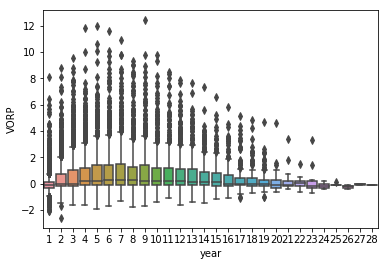

In [450]:
sns.boxplot(x="year", y="VORP", data=advstatsdf);

In [451]:
playeravgvorp = advstatsdf.groupby(['player'],as_index=False)[['VORP']].mean()
playeravgvorp = playeravgvorp.rename(columns = {'VORP':'avgVORP'})
playeravgvorp.sort_values('avgVORP',ascending=False).head(10)

,player,avgVORP
1229,LeBron James,8.060000
1387,Michael Jordan,6.966667
1208,Larry Bird,6.123077
1281,Magic Johnson,5.953846
279,Charles Barkley,5.843750
475,David Robinson,5.778571
321,Chris Paul,5.700000
1090,Karl Malone,5.400000
1723,Russell Westbrook,5.320000
853,James Harden,5.111111


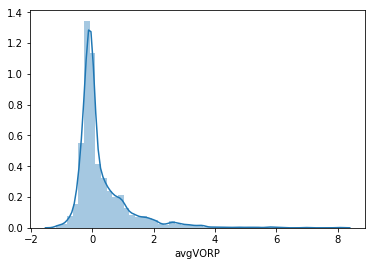

In [452]:
sns.distplot(playeravgvorp.avgVORP, hist=True, kde=True);

In [453]:
playerstartage = advstatsdf.groupby(['player'],as_index = False)[['Age']].min()
playerpos = advstatsdf.groupby(['player','Pos'],as_index = False)['year'].count()
playerpos['count_max'] = playerpos.groupby(['player'])['year'].transform(max)
playerpos = playerpos[playerpos['year'] == playerpos['count_max']]
playerpos = playerpos[['player','Pos']]

In [454]:
playerdatafull = pd.merge(playerdf,playeravgvorp,how='inner')
playerdatafull = pd.merge(playerdatafull,playerstartage,how='inner')
playerdatafull = pd.merge(playerdatafull,playerpos,how='inner')
playerdatafull = pd.merge(playerdatafull,carcoldf,how='left',left_on='player',right_on='name')
playerdatafull.sort_values('avgVORP',ascending=False).shape

(2199, 17)

In [455]:
playerdatafull = playerdatafull[playerdatafull['draftnbr']<31]
playerdatafull = playerdatafull[playerdatafull['draftyr']<2013]
playerdatafull = playerdatafull.drop_duplicates(subset='player',keep=False)
playerdatafull.head()

,player,height,weight,draftnbr,draftyr,recruitnbr,urlx,avgVORP,Age,Pos,name,FG%,3P%,avgPTS,avgMP,avgTRB,avgAST
260,Anthony Davis,6.833333,253,1,2012,1,/players/d/davisan02.html,3.400000,19.0,PF,Anthony Davis,0.623,0.150,14.2,32.0,10.4,1.3
261,Michael Kidd-Gilchrist,6.583333,232,2,2012,3,/players/k/kiddgmi01.html,0.433333,19.0,SF,Michael Kidd-Gilchrist,0.491,0.255,11.9,31.1,7.4,1.9
262,Bradley Beal,6.416667,207,3,2012,4,/players/b/bealbr01.html,1.316667,19.0,SG,Bradley Beal,0.445,0.339,14.8,34.2,6.7,2.2
263,Dion Waiters,6.333333,225,4,2012,31,/players/w/waitedi01.html,-0.312500,21.0,SG,Dion Waiters,0.453,0.348,9.7,20.4,1.9,2.0
264,Thomas Robinson,6.833333,237,5,2012,28,/players/r/robinth01.html,-0.244444,21.0,PF,Thomas Robinson,0.525,0.500,9.8,18.7,7.3,1.0


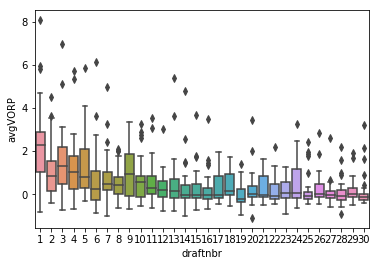

In [456]:
sns.boxplot(x="draftnbr", y="avgVORP", data=playerdatafull);

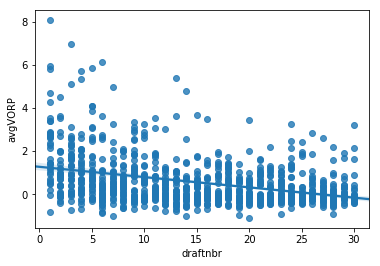

In [457]:
sns.regplot(x="draftnbr", y="avgVORP", data=playerdatafull);

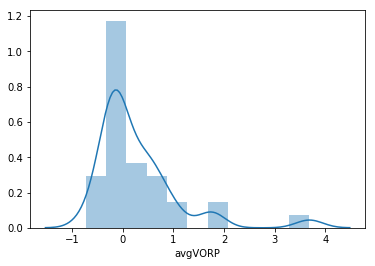

In [458]:
firstpickdraftvorpavg = playerdatafull[playerdatafull['draftnbr']==15]
sns.distplot(firstpickdraftvorpavg.avgVORP, hist=True, kde=True);

In [471]:
modeldatafull = playerdatafull[['draftnbr','Age','height','FG%','3P%','avgPTS','avgMP','avgTRB','avgAST','avgVORP']]
#modeldata = pd.get_dummies(modeldata, drop_first = True)
modeldatafull.isnull().sum()

draftnbr      0
Age           0
height        0
FG%         101
3P%         399
avgPTS      101
avgMP       177
avgTRB      101
avgAST      267
avgVORP       0
dtype: int64

In [460]:
meandatadf = modeldata.mean()
modeldata = modeldatafull.apply(lambda x: x.fillna(x.mean()),axis=0)
modeldata.head()

,draftnbr,Age,height,FG%,3P%,avgPTS,avgMP,avgTRB,avgAST,avgVORP
260,1,19.0,6.833333,0.623,0.150,14.2,32.0,10.4,1.3,3.400000
261,2,19.0,6.583333,0.491,0.255,11.9,31.1,7.4,1.9,0.433333
262,3,19.0,6.416667,0.445,0.339,14.8,34.2,6.7,2.2,1.316667
263,4,21.0,6.333333,0.453,0.348,9.7,20.4,1.9,2.0,-0.312500
264,5,21.0,6.833333,0.525,0.500,9.8,18.7,7.3,1.0,-0.244444


In [461]:
modeldata.corr()

,draftnbr,Age,height,FG%,3P%,avgPTS,avgMP,avgTRB,avgAST,avgVORP
draftnbr,1.000000,0.292028,-0.092186,-0.154647,-0.068696,-0.232967,-0.128728,-0.185212,-0.056676,-0.368640
Age,0.292028,1.000000,-0.045807,0.118771,0.051530,-0.035047,-0.042335,-0.008746,-0.033342,-0.216046
height,-0.092186,-0.045807,1.000000,0.492166,-0.209201,-0.200824,-0.334328,0.575853,-0.632537,-0.008218
FG%,-0.154647,0.118771,0.492166,1.000000,-0.160686,-0.043192,-0.225970,0.482510,-0.447735,0.100795
3P%,-0.068696,0.051530,-0.209201,-0.160686,1.000000,0.135588,0.154214,-0.177176,0.212047,0.096097
avgPTS,-0.232967,-0.035047,-0.200824,-0.043192,0.135588,1.000000,0.634881,0.275686,0.154072,0.120581
avgMP,-0.128728,-0.042335,-0.334328,-0.225970,0.154214,0.634881,1.000000,0.105942,0.397423,0.117598
avgTRB,-0.185212,-0.008746,0.575853,0.482510,-0.177176,0.275686,0.105942,1.000000,-0.439099,0.180953
avgAST,-0.056676,-0.033342,-0.632537,-0.447735,0.212047,0.154072,0.397423,-0.439099,1.000000,0.164152
avgVORP,-0.368640,-0.216046,-0.008218,0.100795,0.096097,0.120581,0.117598,0.180953,0.164152,1.000000


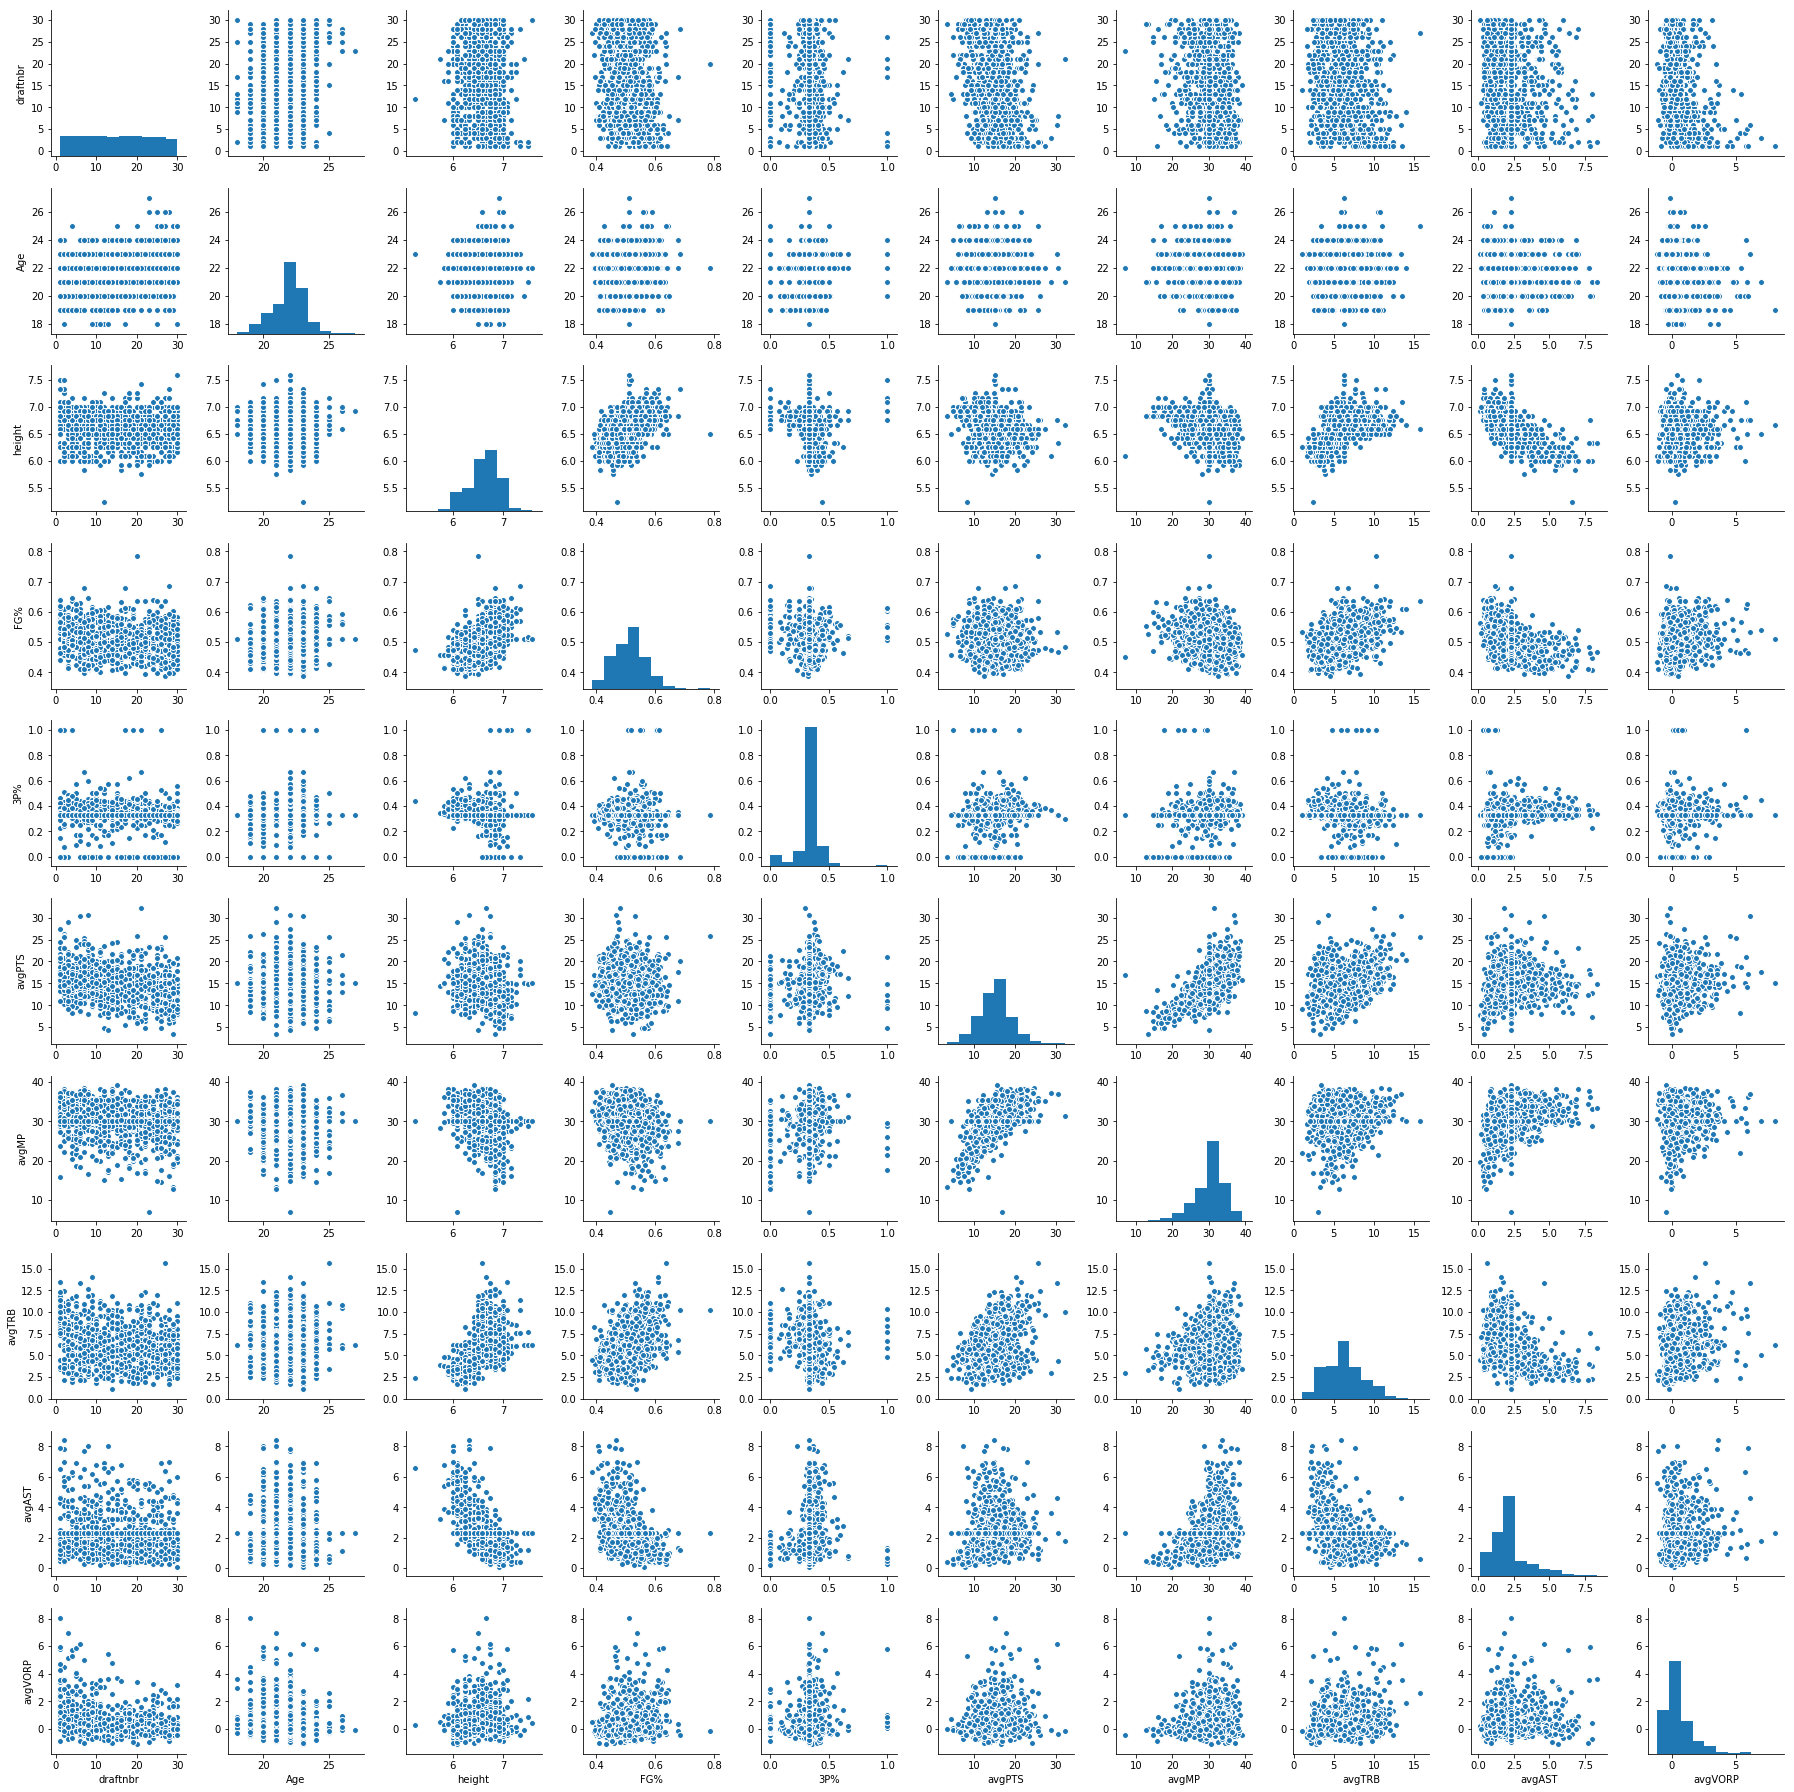

In [462]:
sns.pairplot(modeldata);

In [463]:
modeldata.to_pickle('data/modeldata.pkl')

In [464]:
X = np.array(modeldata[['draftnbr','Age']])
#X = np.c_[np.ones(X.shape[0]), X]
y = np.array(modeldata['avgVORP'])

In [465]:
y_log = np.log10(np.array(y)+1e1)

In [466]:
logreg = LinearRegression()
logreg.fit(X,y_log)
x = [logreg.intercept_,logreg.coef_]
x

[1.1257870493800168, array([-0.00165118, -0.00364989])]

In [467]:
model = pd.DataFrame()
model['X'] = modeldata['draftnbr']
model['y'] = y_log
model['yhat'] = logreg.predict(X)
model['residuals'] = model['yhat'] - model['y']
model['sst'] = model['y'] - model['y'].mean()
model.head()

,X,y,yhat,residuals,sst
260,1,1.127105,1.054788,-0.072317,0.106239
261,2,1.018423,1.053137,0.034714,-0.002443
262,3,1.053719,1.051486,-0.002233,0.032853
263,4,0.986212,1.042535,0.056323,-0.034654
264,5,0.989252,1.040883,0.051631,-0.031614


In [468]:
sse = sum(model['residuals']**2)
sst = sum(model['sst']**2)
rsq = 1 - (sse/sst)
rsq

0.15273567005298028

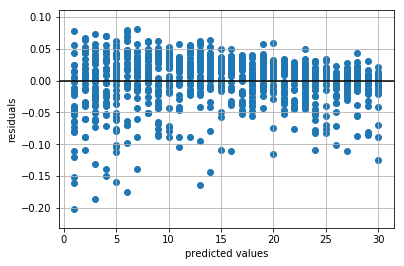

In [469]:
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
axes.scatter(model['X'],model['residuals'])
axes.axhline(y=0, color='k')
axes.grid()
axes.set_xlabel('predicted values')
axes.set_ylabel('residuals');